In [5]:
# This is the test script for the final submission 
# No external library other than numpy is allowed 

# sys is only used to point to the correct folder
import sys
sys.path.insert(0, 'project1/scripts')

# import all the functions from the helper module 
from proj1_helpers import *
from implementations import *
from proj1_plot_helpers import * 

In [6]:
# Import, fill in missing values with average, and perform data preprocessing 
y, inputs, ids = load_clean_csv("train.csv", True, "avg", True)

In [7]:
# y = y[0:200]
# inputs = inputs[0:200]
# ids = ids[0:200]

In [8]:
print(inputs.shape)

(5000, 30)


In [5]:
# Obtain features by finding correlation coefficients
coef_vec = pairwise_correlation(y, inputs)
# pairwise_correlation_plot(coef_vec)

feature_threshold = 0.1 
feature_list = feature_select(coef_vec, feature_threshold)
corr_matrix = correlation_matrix(inputs, feature_list)
# print("feature list before removing the duplicates", feature_list)
# feature_correlation_plot(corr_matrix)


In [6]:
# remove from feature list features with correlation coef higher than threhold
duplicate_threshold = 0.8

feature_list = feature_extract(feature_list, corr_matrix, duplicate_threshold)
corr_matrix = correlation_matrix(inputs, feature_list)
# print("feature list after removing the duplicates", feature_list)
# feature_correlation_plot(corr_matrix)

In [7]:
# Compute an initial w0 using linear regression to feed into logistic regression 
tx = build_poly(inputs, 1)
w0, _ = least_squares(y, tx)

In [9]:
feature_list = [1, 2, 4, 7, 10, 11, 12, 13, 16, 19]

In [10]:
# Build logistic regression model over the training data 
# max_it = 50
# gamma = 0.001

# w_init = np.zeros(tx_train.shape[1])

# # find optimal gamma 
# tx_train, y_train, tx_test, y_test = split_data(tx, y, 0.5)

# rmse_tr = [] 
# rmse_te = [] 
# gammas = []

# while (gamma<1): 
#     w, loss_tr = logistic_regression(y_train, tx_train, w0, max_it, gamma)
    
#     rmse_train = np.sqrt(2*compute_mse(y_train, tx_train, w))
#     print("rmse_train", rmse_train)
#     rmse_test = np.sqrt(2*compute_mse(y_test, tx_test, w))
#     print("rmse_test", rmse_test)
#     gammas.append(gamma)
#     print("gamma", gamma)
#     rmse_tr.append(rmse_train)
#     rmse_te.append(rmse_test)
# #     opt_gamma = gammas[np.argmin(rmse_te)]
#     gamma = gamma*5 
    
#     return opt_gamma, rmse_tr, rmse_te  
    

In [11]:
# print(rmse_tr)

In [12]:
import itertools as it

def build_poly_plus(x, degree):
    """
    Builds polynomial basis function of a certain degree combining all features.
    """
    poly = np.ones((len(x), 1))

    for deg in range(1, degree+1):
#         print(deg)
        if deg == 1:
            poly = np.c_[poly, x]
        else:
            for i in it.combinations_with_replacement(range(x.shape[1]),deg):
                poly = np.c_[poly, np.prod(x[:,i],1)]
    return poly

In [33]:
x = inputs[:, feature_list]
degree = 3
k_fold = 4

tx = build_poly_plus(x, degree)
# print(tx.shape)
lambdas = np.logspace(-5, 0, 30)
gammas = np.logspace(-5, 0, 20)

init_w = np.zeros(tx.shape[1])
max_it = 50

opt_lambda, rmse_tr, rmse_te = find_desired_var(lambdas, y, tx, k_fold, ridge_regression)
print("ridge regression done. opt_lambda is", opt_lambda)
opt_gamma_1, rmse_tr1, rmse_te1 = find_desired_var(gammas, y, tx, k_fold, logistic_regression, init_w, max_it)
print("logistic regression done. opt_gamma is", opt_gamma_1)
opt_gamma_2, rmse_tr2, rmse_te2 = find_desired_var(gammas, y, tx, k_fold, least_squares_GD, init_w, max_it)
print("least squares GD done. opt_gamma is", opt_gamma_2)
opt_gamma_3, rmse_tr3, rmse_te3 = find_desired_var(gammas, y, tx, k_fold, least_squares_SGD, init_w, max_it)
print("least squares SGD done. opt_gamma is", opt_gamma_3)

ridge regression done. opt_lambda is 0.6723357536499335
logistic regression done. opt_gamma is 1e-05
least squares GD done. opt_gamma is 0.00020691380811147902
least squares SGD done. opt_gamma is 3.359818286283781e-05


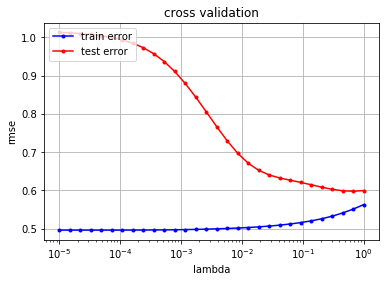

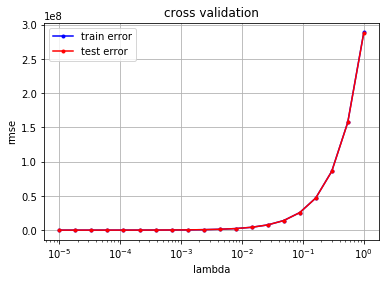

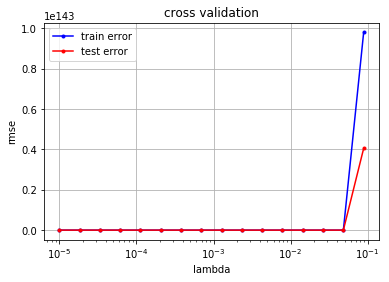

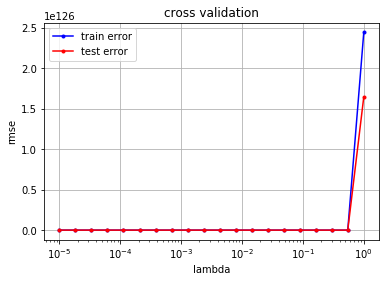

In [34]:
cross_validation_plot(lambdas, rmse_tr, rmse_te)
cross_validation_plot(gammas, rmse_tr1, rmse_te1)
cross_validation_plot(gammas, rmse_tr2, rmse_te2)
cross_validation_plot(gammas, rmse_tr3, rmse_te3)

In [35]:
tx_train, y_train, tx_test, y_test = split_data(tx, y, 0.5)

# # weights, mse = ridge_regression(y_train, tx_train, opt_lambda)

init_w = np.zeros(tx_train.shape[1])
max_it = 50

w, mse = find_weight(y, tx, k_fold, least_squares)
w1, mse1 = find_weight(y, tx, k_fold, least_squares_GD, init_w, max_it, opt_gamma_1)
w2, mse2 = find_weight(y, tx, k_fold, least_squares_SGD, init_w, max_it, opt_gamma_2 )
w3, mse3 = find_weight(y, tx, k_fold, ridge_regression, opt_lambda)
w4, mse4 = find_weight(y, tx, k_fold, logistic_regression, init_w, max_it, opt_gamma_3)


In [40]:
# LS 
y_pred = predict_labels(w, tx_test)

compute_score(y_test, y_pred)

rmse_train = np.sqrt(2*compute_mse(y_train, tx_train, w))
rmse_test = np.sqrt(2*compute_mse(y_test, tx_test, w))
print("Train RMSE:", rmse_train, ", Test RMSE:", rmse_test)

Total correct: 2061.0 
Total incorrect: 439.0 
Correct percentage: 82.44 %
Train RMSE: 0.8811029160061484 , Test RMSE: 0.9028157380337303


In [36]:
# LS GD
y_pred = predict_labels(w1, tx_test)

compute_score(y_test, y_pred)

rmse_train = np.sqrt(2*compute_mse(y_train, tx_train, w1))
rmse_test = np.sqrt(2*compute_mse(y_test, tx_test, w1))
print("Train RMSE:", rmse_train, ", Test RMSE:", rmse_test)

Total correct: 1776.0 
Total incorrect: 724.0 
Correct percentage: 71.04 %
Train RMSE: 0.997702362625182 , Test RMSE: 0.9966890435774718


In [37]:
# LS SGD
y_pred = predict_labels(w2, tx_test)

compute_score(y_test, y_pred)

rmse_train = np.sqrt(2*compute_mse(y_train, tx_train, w2))
rmse_test = np.sqrt(2*compute_mse(y_test, tx_test, w2))
print("Train RMSE:", rmse_train, ", Test RMSE:", rmse_test)

Total correct: 1378.0 
Total incorrect: 1122.0 
Correct percentage: 55.120000000000005 %
Train RMSE: 82.39452339584108 , Test RMSE: 124.89181019541525


In [38]:
# Ridge regression
y_pred = predict_labels(w3, tx_test)

compute_score(y_test, y_pred)

rmse_train = np.sqrt(2*compute_mse(y_train, tx_train, w3))
rmse_test = np.sqrt(2*compute_mse(y_test, tx_test, w3))
print("Train RMSE:", rmse_train, ", Test RMSE:", rmse_test)

Total correct: 2003.0 
Total incorrect: 497.0 
Correct percentage: 80.12 %
Train RMSE: 0.9248106167119639 , Test RMSE: 0.9288078048451419


In [39]:
# Logistic regression
y_pred = predict_labels(w4, tx_test)

compute_score(y_test, y_pred)

rmse_train = np.sqrt(2*compute_mse(y_train, tx_train, w4))
rmse_test = np.sqrt(2*compute_mse(y_test, tx_test, w4))
print("Train RMSE:", rmse_train, ", Test RMSE:", rmse_test)

Total correct: 1640.0 
Total incorrect: 860.0 
Correct percentage: 65.60000000000001 %
Train RMSE: 1126.4987503545692 , Test RMSE: 2438.4234187897737


In [14]:
y_test, inputs_test, ids_test = load_clean_csv('test.csv', False, "avg", True)

In [ ]:
tx_test = build_poly_plus(inputs_test[:,feature_list], degree)
y_pred = predict_labels(weights, tx_test)

In [ ]:
# create_csv_submission(ids_test, y_pred, "prediction.csv")